In [1]:
# Import files for use in the program:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import numpy as np

#import json
#import sys
#import re


In [5]:
# Import CSV files into a data frame
Crash_Data_df = pd.read_csv("Data/crash_data_2.csv",encoding='utf-8')
                            
#split date column
Crash_Data_df[["Day", "Month", "DayNum","Time","Zone","Year"]] = Crash_Data_df["Date"].str.split(" ", n = 6, expand = True) 

#define max and min dates
d_max=Crash_Data_df["Date"].min()
d_min=Crash_Data_df["Date"].max()

#split name column
Crash_Data_df[["A","B"]] = Crash_Data_df["Name"].str.split("_|2018100", n = 2, expand = True) 

#Drop time zone
Crash_Data_df.drop(['Zone'], axis = 1, inplace = True)
Crash_Data_df.reset_index(drop=True)

# group by unnamed column
Crash_Data_df = Crash_Data_df.loc[Crash_Data_df['Unnamed: 0'] == 0, :]

#del columns
del Crash_Data_df['Unnamed: 0']
del Crash_Data_df['Name']
del Crash_Data_df['A']

Crash_Data_df = Crash_Data_df.loc[Crash_Data_df['B'] != 9954815, :]

Crash_Data_df = Crash_Data_df.dropna(how='any')
Crash_Data_df.drop_duplicates(subset=['Time'], keep=False)
Crash_Data_df.sort_values(by=['B'])
Crash_Data_df.reset_index(drop=True)
Crash_Data_df = Crash_Data_df.rename(columns={'B':'ID','Date':'DATE','Direction':'DIRECTION','Road':'ROAD','Location':'LOCATION','Event':'EVENT','Day':'DAY','Month':'MONTH','DayNum':'DAYNUM','Time':'TIME','Year':'YEAR'})

Crash_Data_df.set_index('ID', inplace=True,drop=True)

Crash_Data_df.to_csv("Data/crash_data_check.csv", index=False, header=True)
Crash_Data_df.drop_duplicates()

Crash_Data_df.groupby("ID").filter(lambda x: len(x) > 1)

Crash_Data_df.to_csv("Data/crash_data_filtered.csv", index=True, header=True)

Crash_Data_df.head(3)

,DATE,DIRECTION,ROAD,LOCATION,EVENT,DAY,MONTH,DAYNUM,TIME,YEAR
ID,,,,,,,,,,
9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,07,03:35:22,2018
9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,07,03:35:22,2018
9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,07,03:35:22,2018


In [6]:
Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.drop_duplicates(subset=['DAYNUM'][0], keep=False)
#Crash_Data_df.drop_duplicates(subset=['TIME'], keep=False, inplace=True)
Crash_Data_df.head(3)

,ID,DATE,DIRECTION,ROAD,LOCATION,EVENT,DAY,MONTH,DAYNUM,TIME,YEAR
0,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018
1,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018
2,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018


In [7]:
#Crash_Data_df.dtypes
import win32com.client 

run_xl = win32com.client.Dispatch('Excel.Application')
run_xl.Workbooks.Open('C:\CrashDataFilterMacro.xlsm')
run_xl.Application.Run("Macro1")
run_xl.Application.Quit()
 
#PRINT FINAL COMPLETED MESSAGE#
print("Macro refresh completed!")

com_error: (-2147352567, 'Exception occurred.', (0, 'Microsoft Excel', "Sorry, we couldn't find C:\\CrashDataFilterMacro.xlsm. Is it possible it was moved, renamed or deleted?", 'xlmain11.chm', 0, -2146827284), None)

In [9]:
############################################
# BUG - This needs to be fixed once the macro is fixed.
# right now all the incident visuals are referencing the un-macro'd data
###########################################################################

Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.head(2)

,ID,DATE,DIRECTION,ROAD,LOCATION,EVENT,DAY,MONTH,DAYNUM,TIME,YEAR
0,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018
1,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018


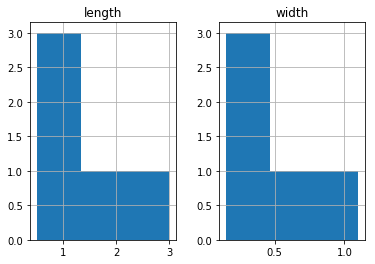

In [10]:
df = pd.DataFrame({
...     'length': [1.5, 0.5, 1.2, 0.9, 3],
...     'width': [0.7, 0.2, 0.15, 0.2, 1.1]
...     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
>>> hist = df.hist(bins=3)

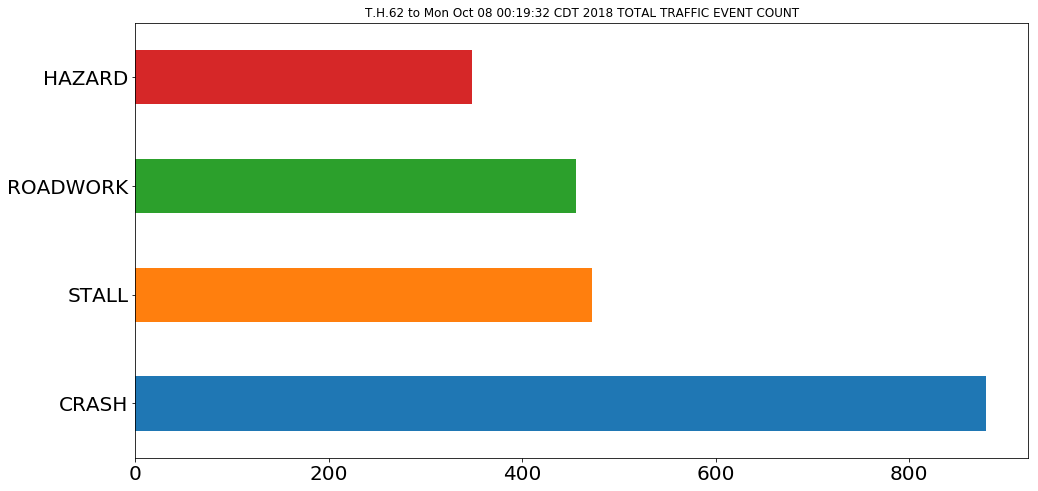

In [12]:
fontsize2use = 15

fontprop = fm.FontProperties(size=fontsize2use)
fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)

Crash_Data_df['EVENT'].value_counts().plot(kind='barh',  title=(f'{d_min} to {d_max} TOTAL TRAFFIC EVENT COUNT'), fontsize=20, stacked=True, figsize=[16,8])

plt.savefig("Images/Event_Count_Summary.png")
plt.show()

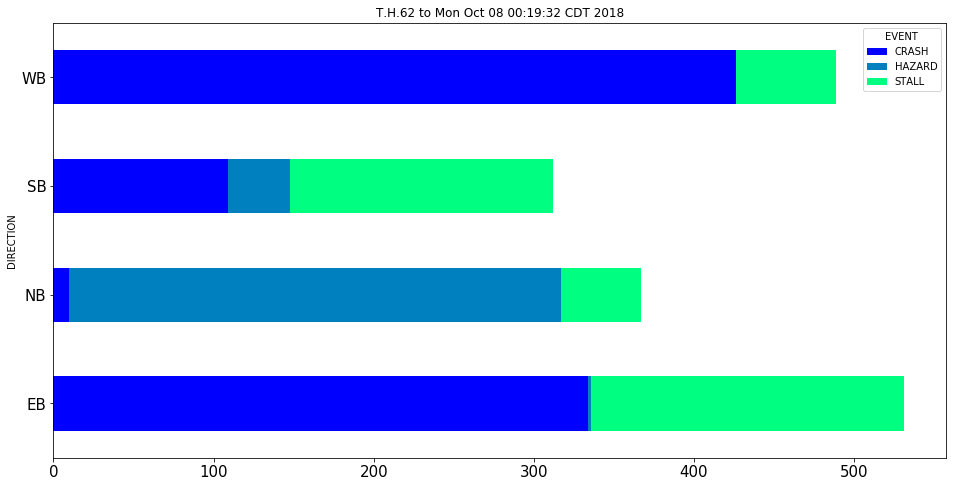

In [8]:
Omit_ROADWORK_Crash_Data_df = Crash_Data_df.loc[Crash_Data_df["EVENT"] != "ROADWORK", :]
flights_by_carrier = Omit_ROADWORK_Crash_Data_df.pivot_table(index='DIRECTION', columns='EVENT', values='DAY', aggfunc='count')
flights_by_carrier.plot(kind='barh', stacked=True,fontsize=15, title=(f'{d_min} to {d_max}'), figsize=[16,8], colormap='winter')

plt.savefig("Images/Crash_Hazards_Stalls_Count.png")

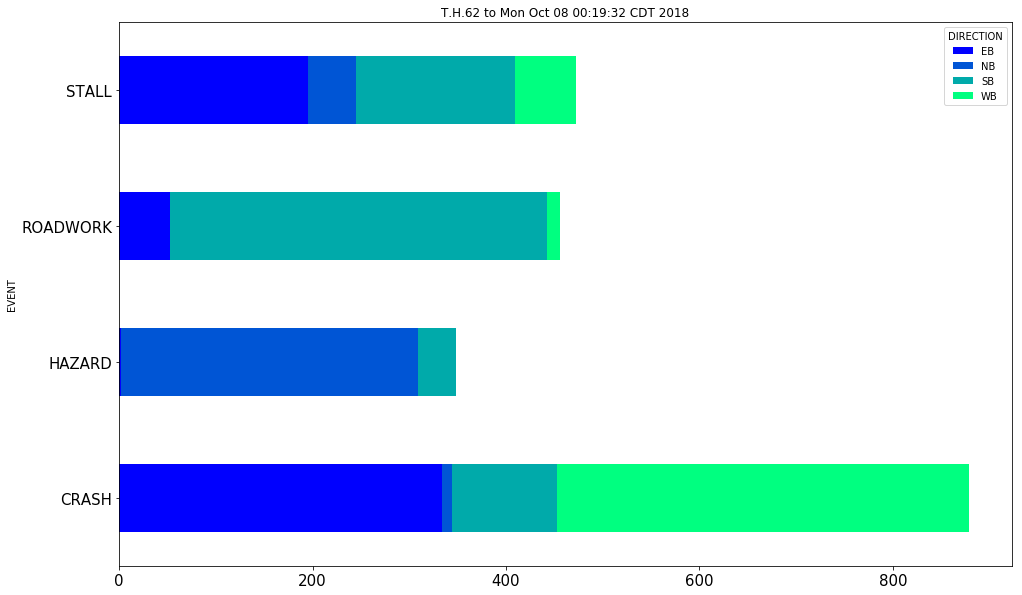

In [23]:
flights_by_carrier = Crash_Data_df.pivot_table(index='EVENT', columns='DIRECTION', values='DAY', aggfunc='count')
flights_by_carrier.plot(kind='barh', stacked=True, title=(f'{d_min} to {d_max}'),fontsize=15, figsize=[16,10], colormap='winter')
plt.savefig("Images/Crash_Hazards_Stalls_by_Direction_Count.png")

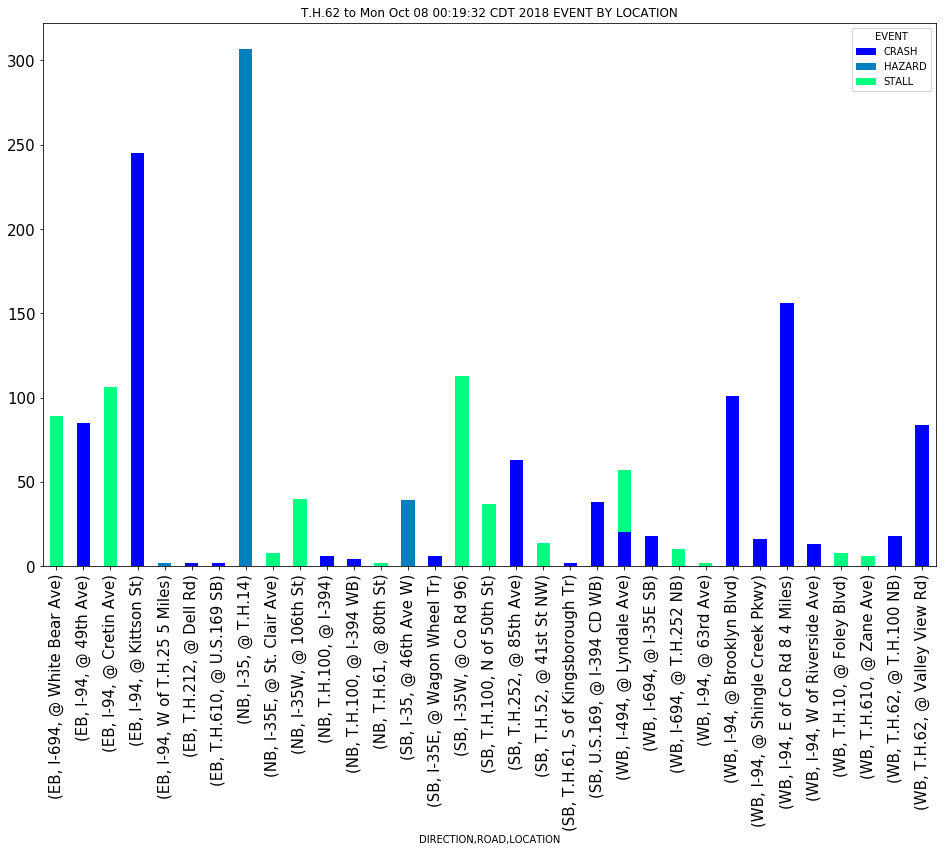

In [22]:
Omit_ROADWORK_Crash_Data_df = Crash_Data_df.loc[Crash_Data_df["EVENT"] != "ROADWORK", :]

group_by_direction_by_event = Omit_ROADWORK_Crash_Data_df.groupby(['DIRECTION','ROAD','LOCATION','EVENT'])

group_by_direction_by_event=group_by_direction_by_event.size().unstack()

group_by_direction_by_event.plot(kind='bar', title=(f'{d_min} to {d_max} EVENT BY LOCATION'), fontsize=15, figsize=[16,10], stacked=True, colormap='winter') # area plot
plt.savefig("Images/Crash_Hazards_Stalls_by_Location_Count.png")

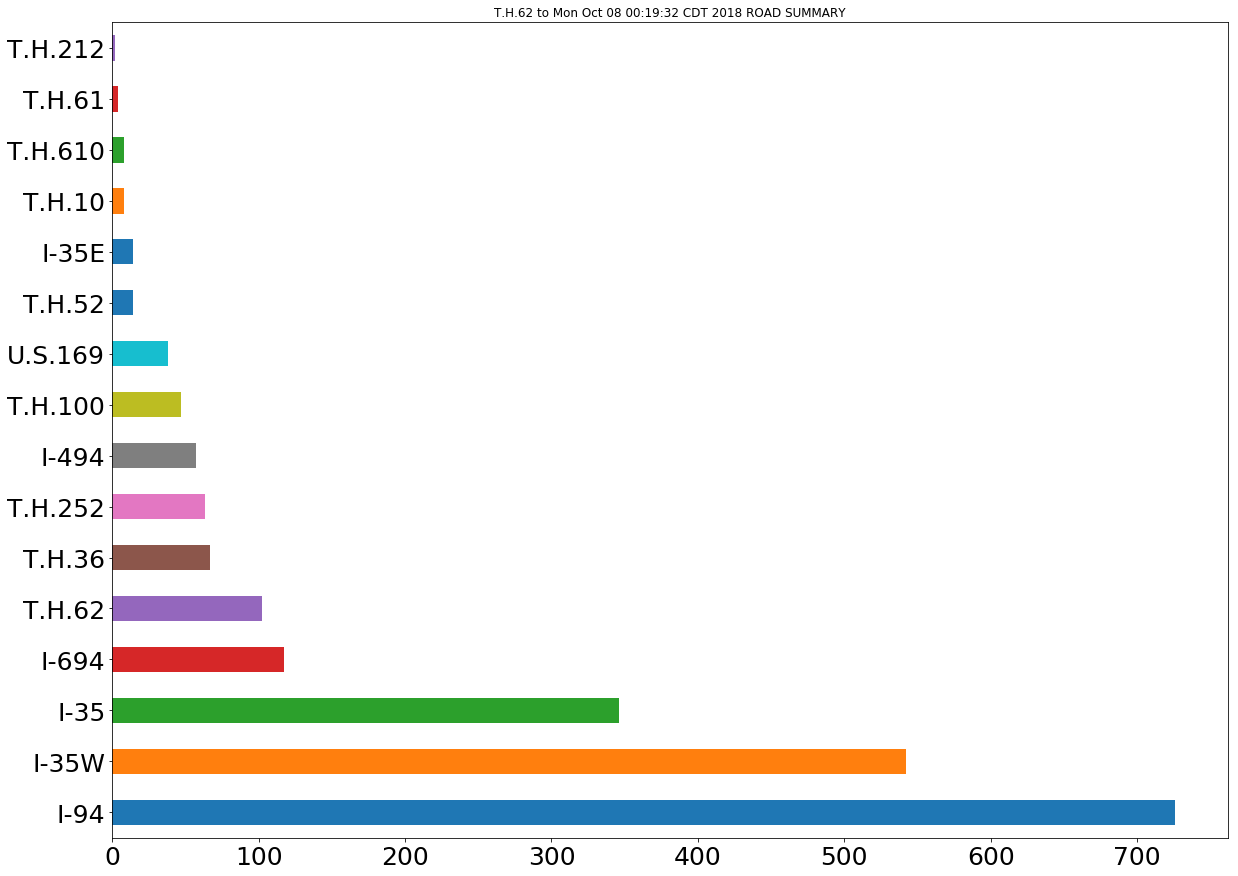

In [20]:
fontsize2use = 25

fontprop = fm.FontProperties(size=fontsize2use)
fig = plt.figure(figsize=(20,15))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)

Crash_Data_df['ROAD'].value_counts().plot(kind='barh',title=(f'{d_min} to {d_max} ROAD SUMMARY'))

plt.savefig("Images/Crash_Hazards_Stalls_by_Road_Count.png")

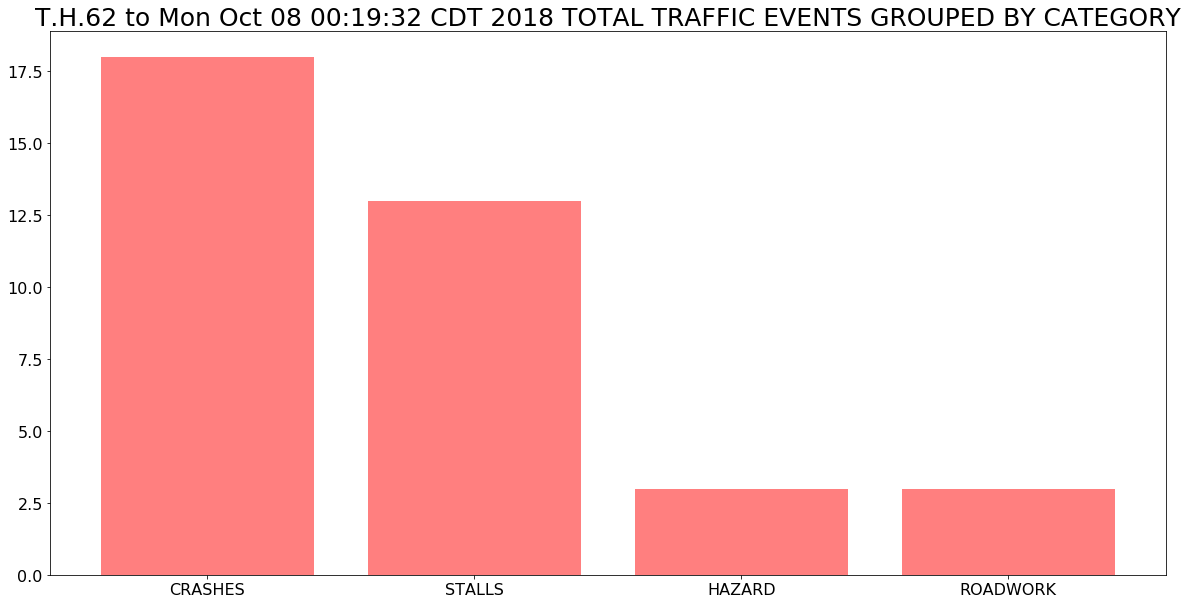

In [19]:
#Filter Event Data for Evenet Summary Chart and Count the Events
Crash_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "CRASH", :]
grouped_Crash_Event = Crash_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event = pd.DataFrame(grouped_Crash_Event["EVENT"].count())
Total_CRASHES=len(grouped_Crash_Event)

Hazard_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "HAZARD", :]
grouped_Hazard_Event = Hazard_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Hazard_Event = pd.DataFrame(grouped_Hazard_Event["EVENT"].count())
Total_HAZARDS=len(grouped_Hazard_Event)

Roadwork_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "ROADWORK", :]
grouped_Roadwork_Event =Roadwork_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Roadwork_Event = pd.DataFrame(grouped_Roadwork_Event["EVENT"].count())
Total_ROADWORK=len(grouped_Roadwork_Event)

Stall_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "STALL", :]
grouped_Stall_Event =Stall_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Stall_Event = pd.DataFrame(grouped_Stall_Event["EVENT"].count())
Total_STALLS=len(grouped_Stall_Event)

# use matplotlib to make a bar chart
EVENTS=["CRASHES", "STALLS", "HAZARD", "ROADWORK"]
Event_COUNT=[Total_CRASHES,Total_STALLS,Total_HAZARDS,Total_ROADWORK]

fontsize2use = 16
fontsize3use = 25

fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)

plt.title((f'{d_min} to {d_max} TOTAL TRAFFIC EVENTS GROUPED BY CATEGORY') ,fontsize=fontsize3use)

plt.bar(EVENTS,Event_COUNT, color=('r'), alpha=0.5, align="center")
    
plt.savefig("Images/Crash_By_Event.png")
plt.show()

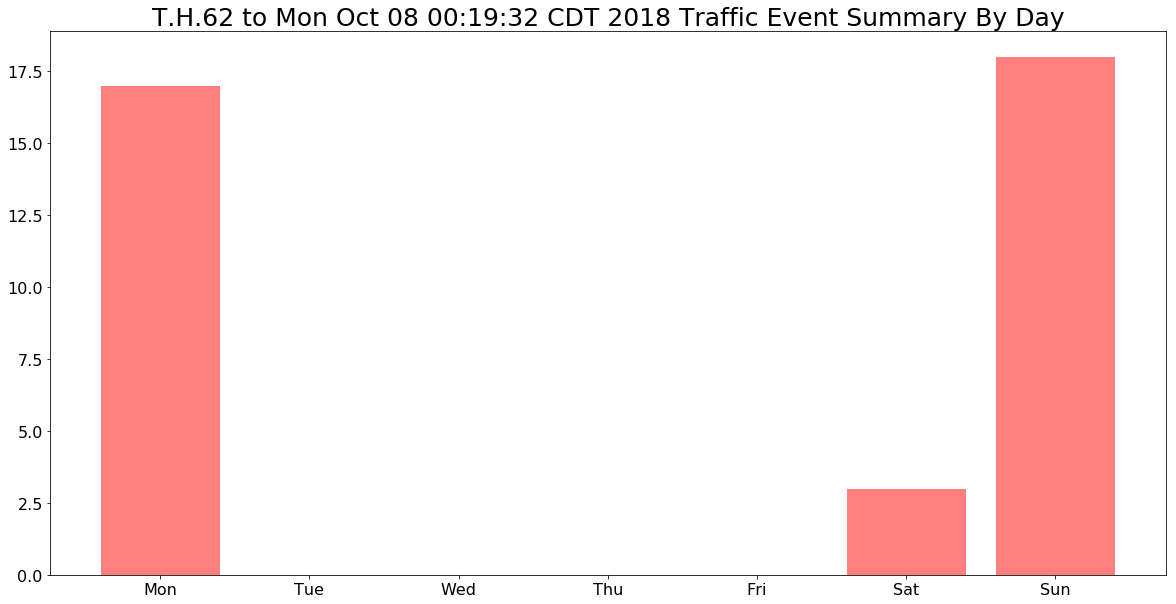

In [18]:
Roadwork_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "ROADWORK", :]
grouped_Roadwork_Event =Roadwork_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Roadwork_Event = pd.DataFrame(grouped_Roadwork_Event["EVENT"].count())
Total_ROADWORK=len(grouped_Roadwork_Event)

#Filter Event Data for Evenet Summary Chart and Count the Events
Crash_Event_Mon = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Mon", :]
grouped_Crash_Event_Mon = Crash_Event_Mon.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Mon = pd.DataFrame(grouped_Crash_Event_Mon["EVENT"].count())
Total_Mon_CRASHES=len(grouped_Crash_Event_Mon)

Crash_Event_Tue = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Tue", :]
grouped_Crash_Event_Tue = Crash_Event_Tue.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Tue = pd.DataFrame(grouped_Crash_Event_Tue["EVENT"].count())
Total_Tue_CRASHES=len(grouped_Crash_Event_Tue)

Crash_Event_Wed = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Wed", :]
grouped_Crash_Event_Wed = Crash_Event_Wed.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Wed = pd.DataFrame(grouped_Crash_Event_Wed["EVENT"].count())
Total_Wed_CRASHES=len(grouped_Crash_Event_Wed)

Crash_Event_Thu = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Thu", :]
grouped_Crash_Event_Thu = Crash_Event_Thu.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Thu = pd.DataFrame(grouped_Crash_Event_Thu["EVENT"].count())
Total_Thu_CRASHES=len(grouped_Crash_Event_Thu)

Crash_Event_Fri = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Fri", :]
grouped_Crash_Event_Fri = Crash_Event_Fri.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event = pd.DataFrame(grouped_Crash_Event_Fri["EVENT"].count())
Total_Fri_CRASHES=len(grouped_Crash_Event_Fri)

Crash_Event_Sat = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Sat", :]
grouped_Crash_Event_Sat = Crash_Event_Sat.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Sat = pd.DataFrame(grouped_Crash_Event_Sat["EVENT"].count())
Total_Sat_CRASHES=len(grouped_Crash_Event_Sat)

Crash_Event_Sun = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Sun", :]
grouped_Crash_Event_Sun = Crash_Event_Sun.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Sun = pd.DataFrame(grouped_Crash_Event_Sun["EVENT"].count())
Total_Sun_CRASHES =len(grouped_Crash_Event_Sun)

# use matplotlib to make a bar chart of crash data by location
EVENTS_BY_DAY=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
Event_COUNT=[Total_Mon_CRASHES,Total_Tue_CRASHES,Total_Wed_CRASHES,
             Total_Thu_CRASHES,Total_Fri_CRASHES,Total_Sat_CRASHES,Total_Sun_CRASHES]

fontsize2use = 16
fontsize3use = 25

fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)

plt.title((f'{d_min} to {d_max} Traffic Event Summary By Day') ,fontsize=fontsize3use)

plt.bar( EVENTS_BY_DAY,Event_COUNT, color=('r'), alpha=0.5, align="center")
  
plt.savefig("Images/Crash_By_Event_By_Day.png")

plt.show()

Crash count by days :2


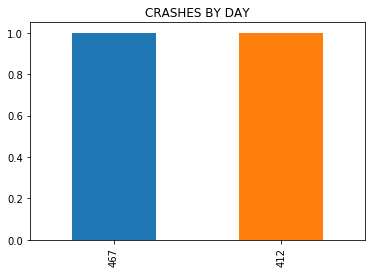

In [17]:
Crash_data_by_day = Crash_Data_df[Crash_Data_df['EVENT'] == 'CRASH']
Crash_count=Crash_data_by_day['DAY'].value_counts()
Crash_days=len(Crash_data_by_day['DAY'].value_counts())
print(f'Crash count by days :{Crash_days}')

Crash_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='CRASHES BY DAY')

plt.savefig("Images/Crash_Count_By_Day.png")


Roadwork count by days :2


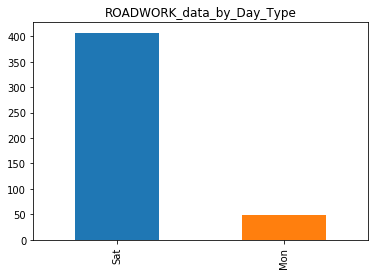

In [15]:

Roadwork_data_by_day= Crash_Data_df[Crash_Data_df['EVENT'] == 'ROADWORK']
Roadwork_Count=Roadwork_data_by_day['DAY'].value_counts()
Roadwork_days=len(Crash_data_by_day['DAY'].value_counts())
print(f'Roadwork count by days :{Roadwork_days}')


Roadwork_data_by_day['DAY'].value_counts().plot(kind='bar', title='ROADWORK_data_by_Day_Type')
plt.savefig("Images/Roadwork_Count_By_Day.png")

Stall count by days : 13


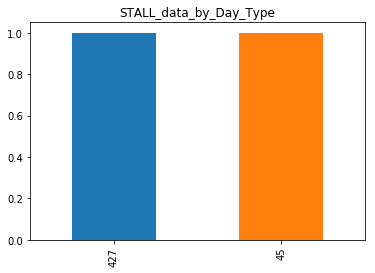

In [16]:
Stall_data_by_day= Crash_Data_df.loc[Crash_Data_df["EVENT"] == "STALL", :]
grouped_Stall_Event =Stall_Event.groupby(["ROAD","LOCATION","DIRECTION"])
grouped_Stall_Event = pd.DataFrame(grouped_Stall_Event["EVENT"].count())
Stall_days=len(grouped_Stall_Event)
print(f'Stall count by days : {Stall_days}')

Stall_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='STALL_data_by_Day_Type')
plt.savefig("Images/Stall_Count_By_Day.png")

Hazard count by days : 2


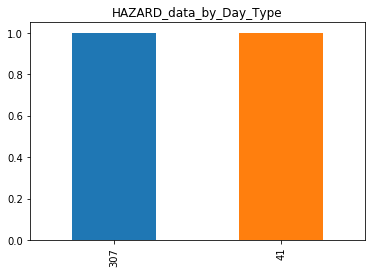

In [17]:
Hazard_data_by_day= Crash_Data_df[Crash_Data_df['EVENT'] == 'HAZARD']
Hazard_Count=Hazard_data_by_day['DAY'].value_counts()
Hazard_days=len(Crash_data_by_day['DAY'].value_counts())

print(f'Hazard count by days : {Hazard_days}')

Hazard_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='HAZARD_data_by_Day_Type')
plt.savefig("Images/Hazard_Count_By_Day.png")